In [1]:
import cv2
import matplotlib.pyplot as plt

In [8]:
img=cv2.imread('elephant.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)


(330, 500, 3)


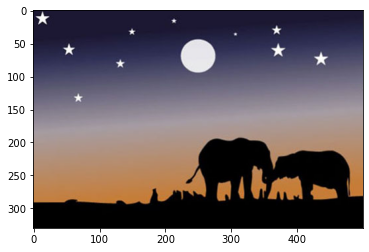

In [9]:
plt.imshow(img)
plt.show()

In [12]:
#flatten img 
all_pixels=img.reshape(330*500,3)
print(all_pixels.shape)

#3 is the channel for RED one channel for G onr channel and for B one channel


(165000, 3)


### K-Means

In [19]:
from sklearn.cluster import KMeans
import numpy as np

In [14]:
dominant_colors=4
km=KMeans(n_clusters=dominant_colors)

In [15]:
km.fit(all_pixels)

KMeans(n_clusters=4)

In [20]:
centers=km.cluster_centers_
centers=np.array(centers,dtype='uint8')

In [21]:
centers

array([[ 38,  35,  64],
       [174, 145, 128],
       [ 99,  95, 118],
       [  1,   0,   1]], dtype=uint8)

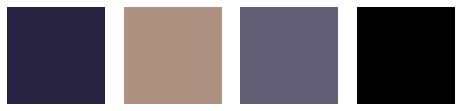

In [34]:
i=1
plt.figure(figsize=(8,5))
color=[]
for each_color in centers:
    plt.subplot(1,4,i) #1 row 4 column 
    plt.axis('off')
    i+=1
    color.append(each_color)
    
    #color swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_color
    
    plt.imshow(a)
plt.show()    

### Segmenting our Orignal Image 

In [36]:
new_image=np.zeros((330*500,3),dtype='uint8')
print(new_image.shape)

(165000, 3)


In [38]:
color

[array([38, 35, 64], dtype=uint8),
 array([174, 145, 128], dtype=uint8),
 array([ 99,  95, 118], dtype=uint8),
 array([1, 0, 1], dtype=uint8)]

In [39]:
km.labels_

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [41]:
for i in range(new_image.shape[0]):
    new_image[i]=color[km.labels_[i]]

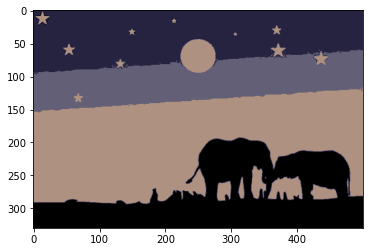

In [43]:
plt.imshow(new_image.reshape(330,500,3))
